# Analysis of Spotify Chart - Regression

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize

In [2]:
#import dataframe
file_name = "spotify_utf.csv"
df_data = pd.read_csv(file_name)
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928/9/25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


There are some columns we don't need. ID is a spotify-generated string that means nothing to this analysis. Release date can be replaced by the Year. And mode is irrelevant in this research. Besides, we want to start from 1950 and ignore the ones with popularity that lower than 2.

In [3]:
#clean up the data
#drop unnecessary columns
df_data_clear = df_data.drop(columns=['id','release_date','mode'])
#drop the rows before 1950
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['year']<1950].index)
#drop the rows whose popularity lower than or equal to 2
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['popularity']<=2].index)
df_data_clear

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
1151,0.9850,"['Franz Schubert', 'Isaac Stern']",0.364,248627,0.0552,0,0.537000,2,0.0946,-23.253,"Sonata for Violin and Piano No. 1 in D Major, ...",4,0.0438,123.672,0.3180,1950
1198,0.0550,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.7390,0,0.871000,7,0.1090,-6.333,Back To The Old School ( V2 ) - Original Stick,13,0.0636,128.005,0.2120,1951
1289,0.9900,['Sonny Terry'],0.616,152693,0.1210,0,0.771000,4,0.3160,-17.309,Alcoholic Blues,3,0.0641,83.076,0.8480,1952
1299,0.8660,['Wallace House'],0.663,195413,0.1500,0,0.000000,7,0.0758,-14.195,On Ilkley Moor Bar t'At,11,0.3220,69.256,0.6430,1952
1399,0.9790,"['Ludwig van Beethoven', 'Daniel Barenboim', '...",0.184,568880,0.0233,0,0.947000,11,0.0940,-30.240,Concerto for Piano and Orchestra No. 5 in E-Fl...,6,0.0368,67.309,0.0822,1953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,I Found You,70,0.0385,129.916,0.4720,2020


We notice that there are some duplicated items in the dataset. It is better to wipe them out.

In [4]:
#identify the duplicated items in the dataset
df_data_clear.duplicated().sum()

45

In [5]:
#get rid of the duplicated items
df_data_clear = df_data_clear[~df_data_clear.duplicated()==1]
df_data_clear.shape

(134183, 16)

Now we have 130000+ items to analyze. First let's do some data visualization.

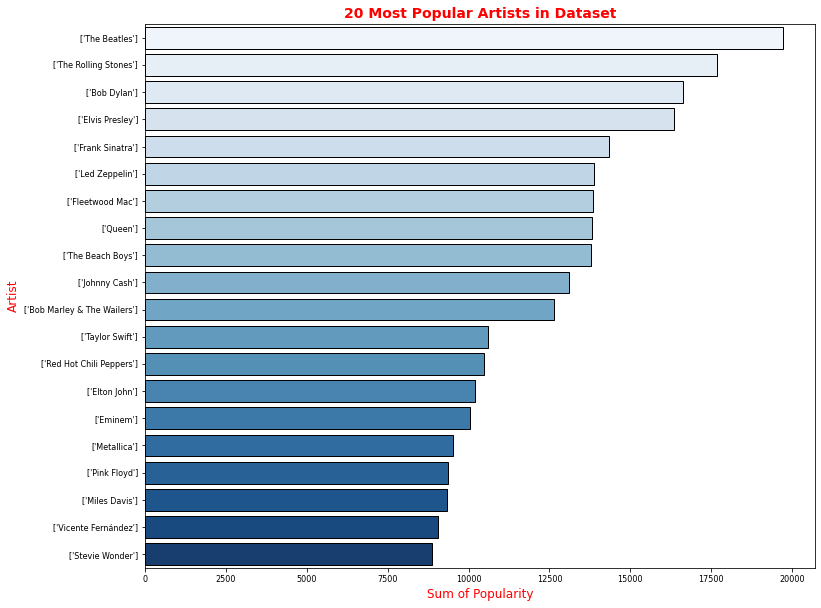

In [6]:
#Plot the most popular artists
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df_data_clear.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

In [7]:
#examine the correlations with Popularity
df_data_clear.corr()['popularity'].sort_values()

acousticness       -0.401253
instrumentalness   -0.172561
liveness           -0.065741
valence            -0.036705
key                 0.015206
duration_ms         0.019499
tempo               0.063841
speechiness         0.092213
danceability        0.220193
explicit            0.285462
energy              0.319182
loudness            0.380985
year                0.790793
popularity          1.000000
Name: popularity, dtype: float64

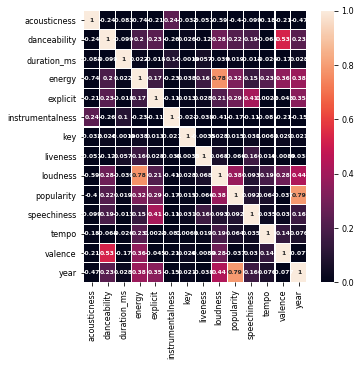

In [8]:
#draw a correlation heatmap
correlation = df_data_clear.corr()
fig = plt.figure() 
ax = sns.heatmap(correlation, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':6,'weight':'bold'})

Draw the scatter plot for every elements with popularity. Observe their relationships.

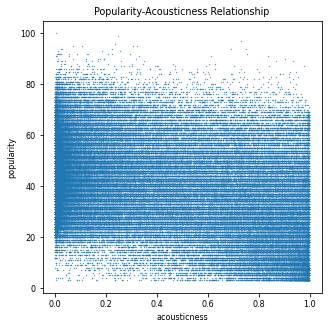

In [9]:
plt.scatter(df_data_clear['acousticness'],df_data_clear['popularity'], s=0.1)
plt.xlabel('acousticness')
plt.ylabel('popularity')
plt.title("Popularity-Acousticness Relationship")
plt.show()

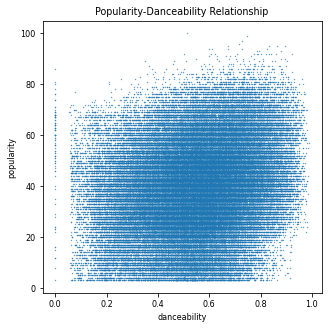

In [10]:
plt.scatter(df_data_clear['danceability'],df_data_clear['popularity'], s=0.1)
plt.xlabel('danceability')
plt.ylabel('popularity')
plt.title("Popularity-Danceability Relationship")
plt.show()

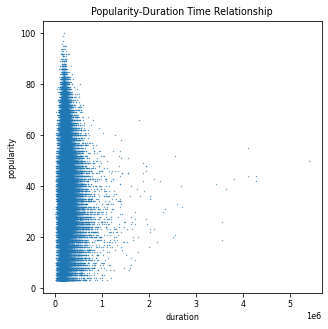

In [11]:
plt.scatter(df_data_clear['duration_ms'],df_data_clear['popularity'], s=0.1)
plt.xlabel('duration')
plt.ylabel('popularity')
plt.title("Popularity-Duration Time Relationship")
plt.show()

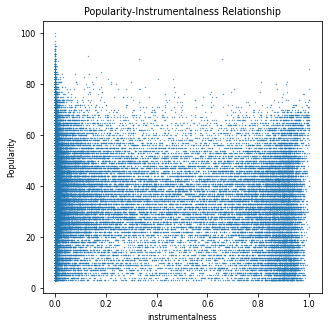

In [12]:
plt.scatter(df_data_clear['instrumentalness'],df_data_clear['popularity'], s=0.1)
plt.xlabel('instrumentalness')
plt.ylabel('Popularity')
plt.title("Popularity-Instrumentalness Relationship")
plt.show()

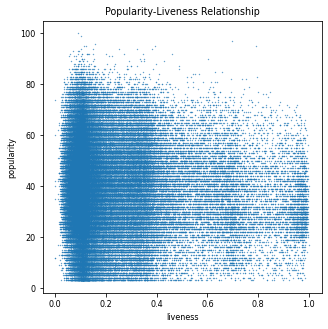

In [13]:
plt.scatter(df_data_clear['liveness'],df_data_clear['popularity'], s=0.1)
plt.xlabel('liveness')
plt.ylabel('popularity')
plt.title("Popularity-Liveness Relationship")
plt.show()

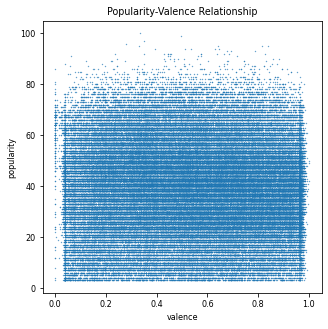

In [14]:
plt.scatter(df_data_clear['valence'],df_data_clear['popularity'], s=0.1)
plt.xlabel('valence')
plt.ylabel('popularity')
plt.title("Popularity-Valence Relationship")
plt.show()

Key feature is a categorical one. Bar plot is more suitable for it.

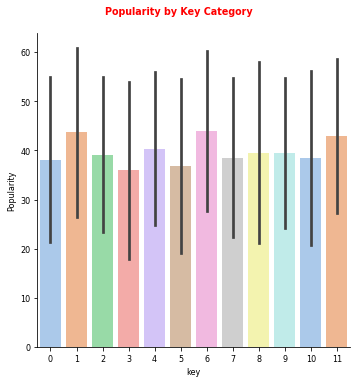

In [15]:
exp_data = sns.catplot(data=df_data_clear, kind="bar",
                        x="key", y="popularity",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
exp_data.fig.suptitle('Popularity by Key Category', y=1.05, c='r', weight='bold')
exp_data.set_axis_labels("key", "Popularity")
plt.show()

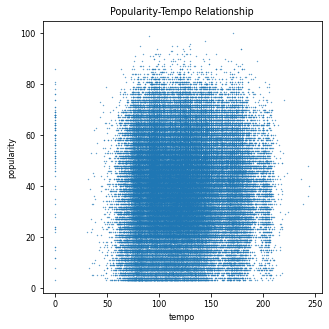

In [16]:
plt.scatter(df_data_clear['tempo'],df_data_clear['popularity'], s=0.1)
plt.xlabel('tempo')
plt.ylabel('popularity')
plt.title("Popularity-Tempo Relationship")
plt.show()

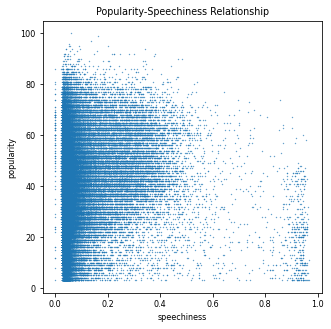

In [17]:
plt.scatter(df_data_clear['speechiness'],df_data_clear['popularity'], s=0.1)
plt.xlabel('speechiness')
plt.ylabel('popularity')
plt.title("Popularity-Speechiness Relationship")
plt.show()

The explicit element is a one-hot value. We use a bar plot. As we can see, the popularity of explicit content is higher than the non-explicit one.

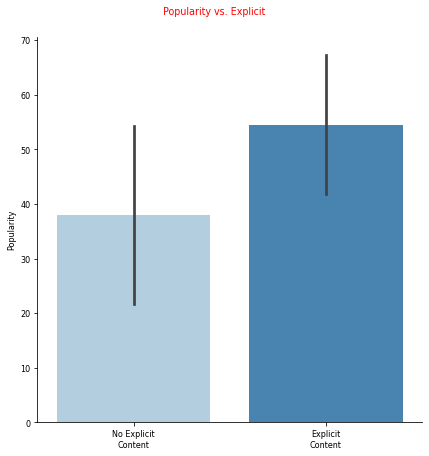

In [18]:
exp_data = sns.catplot(data=df_data_clear, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", palette='Blues',
                        height=6)
exp_data.fig.suptitle('Popularity vs. Explicit', y=1.05, c='r')
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()

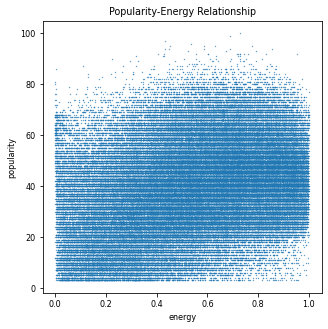

In [19]:
plt.scatter(df_data_clear['energy'],df_data_clear['popularity'], s=0.1)
plt.xlabel('energy')
plt.ylabel('popularity')
plt.title("Popularity-Energy Relationship")
plt.show()

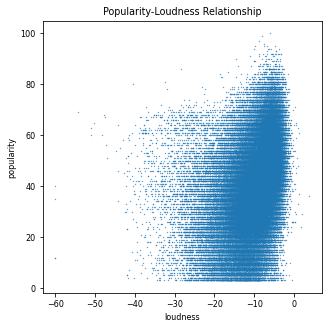

In [20]:
plt.scatter(df_data_clear['loudness'],df_data_clear['popularity'], s=0.1)
plt.xlabel('loudness')
plt.ylabel('popularity')
plt.title("Popularity-Loudness Relationship")
plt.show()

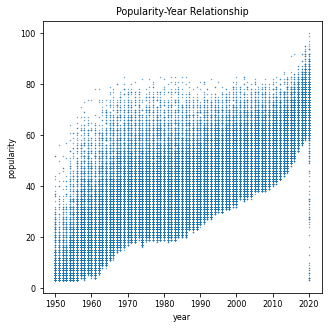

In [21]:
plt.scatter(df_data_clear['year'],df_data_clear['popularity'], s=0.1)
plt.xlabel('year')
plt.ylabel('popularity')
plt.title("Popularity-Year Relationship")
plt.show()

Popularity-Year plot is impressive. It indicates an obvious linear relationship. This reflects that the newers songs tend to get higher popularity.
Now let's build up the linear regression model.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
#Normalize the independent variables that are not in the range [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['loudness','tempo','key','year','duration_ms']
df_data_clear[cols] = scaler.fit_transform(df_data_clear[cols])
df_X = df_data_clear.drop(columns=['artists','name','popularity'])
#Normalize the dependent variables into [0,1]
df_y = df_data_clear['popularity']/100
#Split the train and test set in a 3:1 proportion
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.25,
                                                    random_state=123)
lr=LinearRegression()
%time lr.fit(X_train, y_train)
#Check the train performance
trainings = lr.predict(X_train)
print('The mean absolute error of train is %0.5f'% metrics.mean_absolute_error(y_train, trainings))
print('The root mean squared error of train is %0.5f'% metrics.mean_squared_error(y_train, trainings, squared=False))

Wall time: 31.2 ms
The mean absolute error of train is 0.07951
The root mean squared error of train is 0.10161


<ipython-input-23-38b7da2bcf2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clear[cols] = scaler.fit_transform(df_data_clear[cols])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
#Check the test performance
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
predictions = lr.predict(X_test)
print('The mean absolute error of test is %0.5f'% metrics.mean_absolute_error(y_test, predictions))
print('The root mean squared error of test is %0.5f'% metrics.mean_squared_error(y_test, predictions, squared=False))

Coefficients: [-0.0179615   0.02967922  0.03816872 -0.01839716  0.01087179 -0.02395231
 -0.00057322 -0.02691076  0.06730752 -0.07405329  0.00150011 -0.00495482
  0.45502032]
Intercept: 0.1190174002516794
The mean absolute error of test is 0.07879
The root mean squared error of test is 0.10102


We can see the MAE and the RMSE are both rather small. However, if we restore Popularity to its original range by multiplying 100, the errors will be magnified too. So the real errors are about 8-10. The wall time that the linear regression used is 31.2ms.

Besides linear regression, we can also try decision tree regression.

In [26]:
from sklearn.tree import DecisionTreeRegressor
df_X = df_data_clear.drop(columns=['artists','name','popularity'])
df_y = df_data_clear['popularity']/100
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = 0.25,
                                                    random_state=123)
clf = DecisionTreeRegressor()
%time clf.fit(X_train,y_train)
y_trainP =clf.predict(X_train)
y_testP = clf.predict(X_test)
print('The mean absolute error of train is %0.5f'% metrics.mean_absolute_error(y_train,y_trainP))
print('The root mean squared error of train is %0.5f'% metrics.mean_squared_error(y_train,y_trainP,squared=False))
print('The mean absolute error of test is %0.5f'% metrics.mean_absolute_error(y_test,y_testP))
print('The root mean squared error of test is %0.5f'% metrics.mean_squared_error(y_test,y_testP,squared=False))

Wall time: 1.59 s
The mean absolute error of train is 0.00126
The root mean squared error of train is 0.01116
The mean absolute error of test is 0.10422
The root mean squared error of test is 0.13825


The errors are no better than the linear regression. But the training performance is much better than the testing, indicating a typical disadvantage of DT: tendency to overfit. The wall time of training is 1.59s, longer than the linear regression.